In [1]:
import os
import csv
import sklearn
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# curr_dir = 'C:/Users/m294666/Documents/iezzi_data'
# curr_dir = 'C:/Users/m294666/Documents/iezzi_data_10_10_23/Nevus_sample_images'
# curr_dir = 'C:/Users/m294666/Documents/nevus_data/11_14_23/'
# curr_dir = 'C:/Users/m294666/Documents/nevus_data_500_risk_factors_processed_RF_in_name_CF_only'
# curr_dir = 'C:/Users/m294666/Documents/nevus_data_500_risk_factors_June2024_final'
# curr_dir = 'C:/Users/m294666/Documents/nevus_data_500_NoNevus_June2024_final'
curr_dir = 'C:/Users/m294666/Documents/Dalvin_nevus_std_Normal_COLOR_final'

### Get number of images

In [3]:
# Function to count .jpg files in a directory and its subdirectories
def count_jpg_files(directory):
    jpg_count = 0
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(".jpg"):
                jpg_count += 1
                
    return jpg_count

main_folder = curr_dir

jpg_count = count_jpg_files(main_folder)
print(f"Number of .jpg files: {jpg_count}")

Number of .jpg files: 250


In [16]:
def get_image_count(subfolder_path):
    return sum([1 for item in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, item))])

def calculate_stats(main_dir):
    image_counts = []
    
    for subfolder in os.listdir(main_dir):
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            image_count = get_image_count(subfolder_path)
            image_counts.append(image_count)
    
    if not image_counts:
        return 0, 0
    
    average_images = np.mean(image_counts)
    stdev_images = np.std(image_counts)
    
    return average_images, stdev_images

average, stdev = calculate_stats(curr_dir)

print(f"Average number of images per subfolder: {average}")
print(f"Standard deviation of images per subfolder: {stdev}")


Average number of images per subfolder: 4.010416666666667
Standard deviation of images per subfolder: 2.3082496600358366


### Check if two folders have same name sub-folders

In [6]:
def get_subfolder_names(directory):
    """Retrieve a set of subfolder names from the specified directory."""
    return {name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))}

def check_common_subfolders(dir1, dir2):
    """Check for common subfolders between two directories."""
    subfolders_dir1 = get_subfolder_names(dir1)
    subfolders_dir2 = get_subfolder_names(dir2)
    common_subfolders = subfolders_dir1.intersection(subfolders_dir2)
    if common_subfolders:
        print("Common subfolders found:", common_subfolders)
    else:
        print("No common subfolders.")

# Example usage
dir1 = 'C:/Users/m294666/Documents/nevus_data_500_risk_factors_June2024_final'
dir2 = 'C:/Users/m294666/Documents/Dalvin_nevus_std_Normal_COLOR_final_processed'
check_common_subfolders(dir1, dir2)

No common subfolders.


### Get mean / variance of dataset

In [5]:
directory = 'C:/Users/m294666/Documents/nevus_data_500_risk_factors_processed_RF_in_name_CF_only'

In [7]:
import os
import numpy as np
from PIL import Image

def get_image_paths(directory):
    """Recursively get all image paths in the directory and subdirectories."""
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_paths.append(os.path.join(root, file))
    return image_paths

def process_patches(image, patch_size):
    """Yield patches of the image of given patch size."""
    width, height = image.size
    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            box = (j, i, j + patch_size, i + patch_size)
            yield image.crop(box)

def compute_mean_std(image_paths, patch_size):
    """Compute the mean and standard deviation of the pixel values of image patches for each channel."""
    mean_sum = np.zeros(3)
    std_sum = np.zeros(3)
    n_pixels = np.zeros(3)
    
    for path in image_paths:
        with Image.open(path) as img:
            img = img.convert('RGB')  # Convert image to RGB mode
            for patch in process_patches(img, patch_size):
                patch_array = np.array(patch) / 255.0  # Normalize pixel values to [0, 1]
                n_pixels += patch_array.shape[0] * patch_array.shape[1]
                mean_sum += patch_array.sum(axis=(0, 1))
                std_sum += ((patch_array - patch_array.mean(axis=(0, 1))) ** 2).sum(axis=(0, 1))
    
    mean = mean_sum / n_pixels
    std = np.sqrt(std_sum / n_pixels)
    
    return mean, std

# Specify the directory containing the images and the patch size
patch_size = 512

image_paths = get_image_paths(directory)
mean, std = compute_mean_std(image_paths, patch_size)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

Mean: [0.3183576  0.15440516 0.07345037]
Standard Deviation: [0.14565718 0.08095484 0.05664707]


### Inspect an image

In [71]:
folder_no = 2
image_no = 1
sub_folders = os.listdir(curr_dir)
images = os.listdir(os.path.join(curr_dir,sub_folders[folder_no]))

# img_path = curr_dir+'/2693032/1.2.826.0.2.139953.1.2.50886.43962.34899.1393.jpg'
img_path = curr_dir+'/'+sub_folders[folder_no]+'/'+ images[image_no]
sub_folders

['10524631',
 '10617437',
 '12944653',
 '13013079',
 '2710264',
 '3420234',
 '3444046',
 '3448585',
 '4393598',
 '6005281',
 '7216345',
 '8401627',
 '9737827',
 '9878609',
 '9929298',
 'imagedata.json']

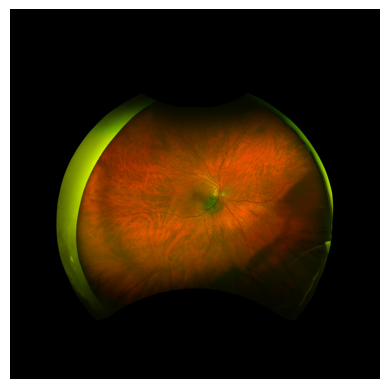

In [73]:
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

### Data Preparation - Batch 1

In [44]:
# data1 = pd.read_excel('C:/Users/m294666/Documents/iezzi_data/Nevus_sample_annotations_09-20-2023.xlsx')
data1 = pd.read_excel('C:/Users/m294666/Documents/iezzi_data_09_20_23/230929_Ch_Nevus_deleted_items_to_ignore.xlsx')
data2 = pd.read_excel('C:/Users/m294666/Documents/iezzi_data_10_10_23/Nevus_sample_summary.xlsx')

In [45]:
data1.head()

,MRN,Date of Birth,DFS,Race,Sex,Melanocytosis,Germline Bap1,Affected Eye,OD VA at DFS (Snellen),OD VA at DFS (logMAR),...,OS Orange pigment,OS CNVM,OS CB involvement,OS Iris involvement,OS Extraocular extension,OS RPE trough,OS Internal reflectivity,OS Cytology,OS Prior treatment,OS Date prior treatment
0,2726561,1950-08-26,2019-07-22,White,Female,False,False,Right,20/20,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,9737827,2002-11-06,2019-07-22,White,Male,True,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
2,3726076,1956-11-25,2019-07-23,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,Low,NaN,NaN,NaN
3,8401627,1989-02-20,2019-07-23,White,Female,False,False,Left,NaN,NaN,...,True,False,False,False,False,True,High,NaN,NaN,NaN
4,12252292,1946-12-21,2019-07-24,White,Female,False,False,Both,20/30,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN


In [46]:
data1['Date of Birth'] = pd.to_datetime(data1['Date of Birth'])
data1['DFS'] = pd.to_datetime(data1['DFS'])

# Calculate the age by subtracting 'birthdate' from 'date_first_seen' and divide by 365 days to get years
data1['age'] = ((data1['DFS'] - data1['Date of Birth']).dt.days / 365).astype('int32')

In [47]:
data1.head()

,MRN,Date of Birth,DFS,Race,Sex,Melanocytosis,Germline Bap1,Affected Eye,OD VA at DFS (Snellen),OD VA at DFS (logMAR),...,OS CNVM,OS CB involvement,OS Iris involvement,OS Extraocular extension,OS RPE trough,OS Internal reflectivity,OS Cytology,OS Prior treatment,OS Date prior treatment,age
0,2726561,1950-08-26,2019-07-22,White,Female,False,False,Right,20/20,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,68
1,9737827,2002-11-06,2019-07-22,White,Male,True,False,Left,NaN,NaN,...,False,False,False,False,False,High,NaN,NaN,NaN,16
2,3726076,1956-11-25,2019-07-23,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,Low,NaN,NaN,NaN,62
3,8401627,1989-02-20,2019-07-23,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,True,High,NaN,NaN,NaN,30
4,12252292,1946-12-21,2019-07-24,White,Female,False,False,Both,20/30,NaN,...,False,False,False,False,False,Medium,NaN,NaN,NaN,72


In [48]:
print(f'Data shape: {data1.shape}')

Data shape: (509, 63)


In [49]:
# data1_cols_new = pd.read_excel('C:/Users/m294666/Documents/iezzi_data/230929_Ch_Nevus_deleted_items_to_ignore.xlsx')

# data1_cols_new = list(data1_cols_new.columns)

# data1_cols_old = list(data1.columns)

# # columns_to_del = [
# #     'Last Name','First Name','History of cutaneous melanoma','Autoimmune disease','Vitiligo',''
# # ]
# len(data1_cols_new)

path_to_directory = 'C:/Users/m294666/Documents/nevus_data_500_risk_factors_June2024_final'

# List all directories in the specified path
directories = [d for d in os.listdir(path_to_directory) if os.path.isdir(os.path.join(path_to_directory, d))]

# Filter the DataFrame to only include rows where the MRN matches a directory name
data1 = data1[data1['MRN'].astype(str).isin(directories)]

In [50]:
print(f'Data shape: {data1.shape}')

Data shape: (384, 63)


In [16]:
cols_to_remove = [item for item in data1_cols_new + data1_cols_old if item not in data1_cols_new or item not in data1_cols_old]

NameError: name 'data1_cols_new' is not defined

In [14]:
cols_to_remove

NameError: name 'cols_to_remove' is not defined

In [51]:
# data1 = data1.drop(columns = cols_to_remove)
data1.head()

,MRN,Date of Birth,DFS,Race,Sex,Melanocytosis,Germline Bap1,Affected Eye,OD VA at DFS (Snellen),OD VA at DFS (logMAR),...,OS CNVM,OS CB involvement,OS Iris involvement,OS Extraocular extension,OS RPE trough,OS Internal reflectivity,OS Cytology,OS Prior treatment,OS Date prior treatment,age
1,9737827,2002-11-06,2019-07-22,White,Male,True,False,Left,NaN,NaN,...,False,False,False,False,False,High,NaN,NaN,NaN,16
2,3726076,1956-11-25,2019-07-23,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,Low,NaN,NaN,NaN,62
3,8401627,1989-02-20,2019-07-23,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,True,High,NaN,NaN,NaN,30
4,12252292,1946-12-21,2019-07-24,White,Female,False,False,Both,20/30,NaN,...,False,False,False,False,False,Medium,NaN,NaN,NaN,72
5,12327313,1957-12-03,2019-07-25,White,Male,False,False,Right,20/20,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,61


In [53]:
data1['Sex'].value_counts()

Sex
Female    236
Male      148
Name: count, dtype: int64

In [57]:
data1['age'].std()

16.970312535746714

In [20]:
def get_row(row):

    row = row.reset_index()

    # Create a new DataFrame using the first column as column names
    new_dataframe = pd.DataFrame(columns=row.iloc[:, 0])

    # Add the second column as the first row in the new DataFrame
    new_dataframe.loc[0] = row.iloc[:, 1].tolist()

    return new_dataframe

new_data1 = pd.DataFrame(columns=data1.columns)

# Iterate through the rows of the original DataFrame
for index, row in data1.iterrows():
    
    row_pd = get_row(row)
    
    if row['Affected Eye'] == 'Both':
        
        # Create a duplicate row with 'Left'
        left_row = row_pd.copy()
        left_row['Affected Eye'] = 'Left'

        # Create a duplicate row with 'Right'
        right_row = row_pd.copy()
        right_row['Affected Eye'] = 'Right'

        # Append both duplicate rows to the new DataFrame
        new_data1 = pd.concat([new_data1,left_row, right_row], axis=0, ignore_index=True)
    else:
        row_normal = row_pd.copy()
#         If 'Affected Eye' is not 'Both', simply add the row to the new DataFrame
        new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)

# The new_df DataFrame now contains the desired changes.
new_data1

,MRN,Date of Birth,DFS,Race,Sex,Melanocytosis,Germline Bap1,Affected Eye,OD VA at DFS (Snellen),OD VA at DFS (logMAR),...,OS CNVM,OS CB involvement,OS Iris involvement,OS Extraocular extension,OS RPE trough,OS Internal reflectivity,OS Cytology,OS Prior treatment,OS Date prior treatment,age
0,2726561,1950-08-26,2019-07-22,White,Female,False,False,Right,20/20,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,68
1,9737827,2002-11-06,2019-07-22,White,Male,True,False,Left,NaN,NaN,...,False,False,False,False,False,High,NaN,NaN,NaN,16
2,3726076,1956-11-25,2019-07-23,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,Low,NaN,NaN,NaN,62
3,8401627,1989-02-20,2019-07-23,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,True,High,NaN,NaN,NaN,30
4,12252292,1946-12-21,2019-07-24,White,Female,False,False,Left,20/30,NaN,...,False,False,False,False,False,Medium,NaN,NaN,NaN,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,3109088,1950-09-14,2023-07-25,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,High,NaN,NaN,NaN,72
529,3268847,1964-06-16,2023-08-03,White,Male,False,False,Right,20/20,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,59
530,12177552,1964-11-04,2023-08-03,White,Female,False,False,Right,20/20,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,58
531,2373561,1953-12-12,2023-08-04,White,Male,False,False,Right,20/20,NaN,...,False,False,False,False,False,NaN,NaN,NaN,NaN,69


In [21]:
new_data2 = new_data1[['MRN','Affected Eye','OD Largest tumor diameter (mm)','OD Largest tumor thickness (mm)','OD Distance to ON (mm)','OD Distance to fov (mm)','OD SRF in fov','OD Orange pigment',
          'OD Internal reflectivity','OD VA at DFS (Snellen)', 'OS Largest tumor diameter (mm)','OS Largest tumor thickness (mm)','OS Distance to ON (mm)','OS Distance to fov (mm)',
          'OS SRF in fov','OS Orange pigment', 'OS Internal reflectivity','OS VA at DFS (Snellen)']]

In [22]:
def process_data(df):
    # Create new columns with default values
    for col in ['dia', 'dia5', 'thick', 'thick2', 'orange', 'srf', 'distance_on', 'distance_fov', 'intref', 'va']:
        df[col] = 0.

    # Iterate through rows
    for index, row in df.iterrows():
        side = 'OS' if row['Affected Eye'] == 'Left' else 'OD'
        
        # dia and dia5 columns
        dia_value = row[f'{side} Largest tumor diameter (mm)']
        df.at[index, 'dia'] = dia_value
        df.at[index, 'dia5'] = 1 if dia_value > 5 else 0
        
        # thick and thick2 columns
        thick_value = row[f'{side} Largest tumor thickness (mm)']
        df.at[index, 'thick'] = thick_value
        df.at[index, 'thick2'] = 1 if thick_value > 2 else 0
        
        # distance_on and distance_fov columns
        df.at[index, 'distance_on'] = row[f'{side} Distance to ON (mm)']
        df.at[index, 'distance_fov'] = row[f'{side} Distance to fov (mm)']
        
        # orange column
        df.at[index, 'orange'] = 1 if row[f'{side} Orange pigment'] else 0
        
        # srf column
        df.at[index, 'srf'] = 1 if row[f'{side} SRF in fov'] else 0
        
        # intref column
        intref_value = row[f'{side} Internal reflectivity']
        df.at[index, 'intref'] = 1 if intref_value in ['Low', 'Medium'] else 0
        
        # va column
        va_value = row[f'{side} VA at DFS (Snellen)'].split('/')[-1]
        if va_value == 'LP':
            df.at[index, 'va'] = 1
        else:
            df.at[index, 'va'] = 1 if int(va_value) >= 50  else 0

    # Drop all columns except 'MRN' and the newly created columns
    df = df[['MRN', 'dia', 'dia5', 'thick', 'thick2', 'orange', 'srf', 'distance_on', 'distance_fov', 'intref', 'va']]
    return df

# Apply the function to the DataFrame
new_data3 = process_data(new_data2)

C:\Users\m294666\AppData\Local\Temp\ipykernel_13928\772337228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = 0.
C:\Users\m294666\AppData\Local\Temp\ipykernel_13928\772337228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = 0.
C:\Users\m294666\AppData\Local\Temp\ipykernel_13928\772337228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [24]:
new_data3

,MRN,dia,dia5,thick,thick2,orange,srf,distance_on,distance_fov,intref,va
0,2726561,11.0,1.0,1.4,0.0,0.0,0.0,10.0,13.0,0.0,0.0
1,9737827,6.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0
2,3726076,4.0,0.0,0.9,0.0,0.0,0.0,4.0,1.0,1.0,0.0
3,8401627,5.0,0.0,1.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,12252292,8.0,1.0,1.3,0.0,0.0,0.0,10.0,13.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
528,3109088,5.0,0.0,0.6,0.0,0.0,0.0,2.0,5.0,0.0,0.0
529,3268847,3.0,0.0,0.6,0.0,0.0,0.0,5.0,2.0,0.0,0.0
530,12177552,2.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0
531,2373561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [32]:
# Assuming new_data3 is your DataFrame and 'path_to_directory' is the path to your directory
path_to_directory = 'C:/Users/m294666/Documents/nevus_data_500_risk_factors_June2024_final'

# List all directories in the specified path
directories = [d for d in os.listdir(path_to_directory) if os.path.isdir(os.path.join(path_to_directory, d))]

# Filter the DataFrame to only include rows where the MRN matches a directory name
new_data4 = new_data3[new_data3['MRN'].astype(str).isin(directories)]

In [33]:
new_data4

,MRN,dia,dia5,thick,thick2,orange,srf,distance_on,distance_fov,intref,va
1,9737827,6.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0
2,3726076,4.0,0.0,0.9,0.0,0.0,0.0,4.0,1.0,1.0,0.0
3,8401627,5.0,0.0,1.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,12252292,8.0,1.0,1.3,0.0,0.0,0.0,10.0,13.0,1.0,0.0
5,12252292,2.0,0.0,0.0,0.0,0.0,0.0,12.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
528,3109088,5.0,0.0,0.6,0.0,0.0,0.0,2.0,5.0,0.0,0.0
529,3268847,3.0,0.0,0.6,0.0,0.0,0.0,5.0,2.0,0.0,0.0
530,12177552,2.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0
531,2373561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


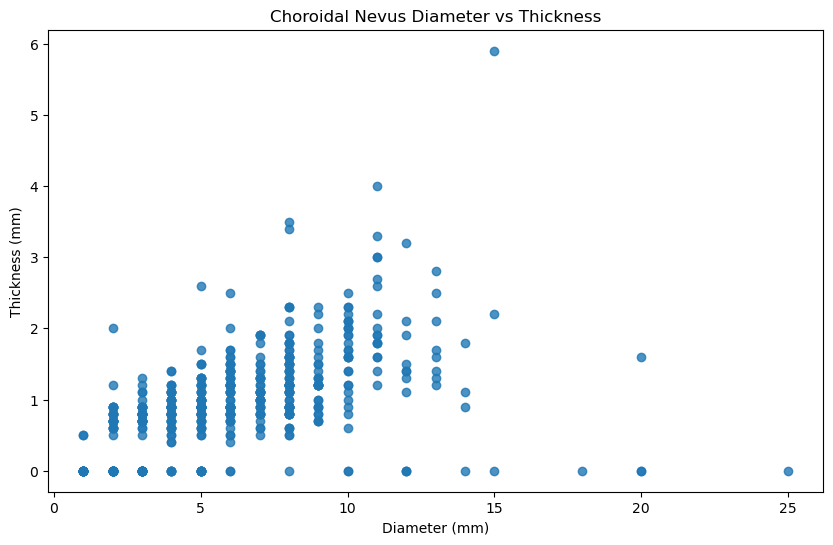

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(new_data3['dia'], new_data3['thick'], alpha=0.8)
plt.title('Choroidal Nevus Diameter vs Thickness')
plt.xlabel('Diameter (mm)')
plt.ylabel('Thickness (mm)')
plt.grid(False)
plt.show()

In [39]:
new_data4['intref'].value_counts()

intref
0.0    276
1.0    128
Name: count, dtype: int64

In [69]:
new_data4['thick'].mean()

0.9702970297029703

In [40]:
new_data4['risk_factors'] = new_data4['dia5']+new_data4['thick2']+new_data4['orange']+new_data4['srf']+new_data4['intref']+new_data4['va']

C:\Users\m294666\AppData\Local\Temp\ipykernel_13928\261734131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data4['risk_factors'] = new_data4['dia5']+new_data4['thick2']+new_data4['orange']+new_data4['srf']+new_data4['intref']+new_data4['va']


In [41]:
new_data3.head(50)

,MRN,dia,dia5,thick,thick2,orange,srf,distance_on,distance_fov,intref,va
0,2726561,11.0,1.0,1.4,0.0,0.0,0.0,10.0,13.0,0.0,0.0
1,9737827,6.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0
2,3726076,4.0,0.0,0.9,0.0,0.0,0.0,4.0,1.0,1.0,0.0
3,8401627,5.0,0.0,1.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,12252292,8.0,1.0,1.3,0.0,0.0,0.0,10.0,13.0,1.0,0.0
5,12252292,2.0,0.0,0.0,0.0,0.0,0.0,12.0,9.0,0.0,0.0
6,12327313,6.0,1.0,1.3,0.0,0.0,0.0,4.0,7.0,1.0,0.0
7,10431813,9.0,1.0,2.2,1.0,0.0,0.0,16.0,13.0,1.0,0.0
8,9841402,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0
9,10524631,4.0,0.0,1.1,0.0,1.0,0.0,5.0,5.0,0.0,0.0


In [43]:
new_data4['risk_factors'].value_counts()

risk_factors
0.0    161
1.0    103
2.0     91
3.0     41
4.0      8
Name: count, dtype: int64

In [194]:
for index,row in new_data1.iterrows():
    row_pd = get_row(row)
    break
row_pd.columns
od_columns = [col for col in row_pd.columns if col.startswith('OD')]

od_columns

cleaned_columns = [col.replace('OD ', '') for col in od_columns]

['OD VA at DFS (Snellen)',
 'OD VA at DFS (logMAR)',
 'OD IOP at DFS',
 'OD Largest tumor quadrant',
 'OD Largest tumor posterior margin',
 'OD Largest tumor anterior margin',
 'OD Largest tumor diameter (mm)',
 'OD Largest tumor thickness (mm)',
 'OD Distance to ON (mm)',
 'OD Distance to fov (mm)',
 'OD Tumor shape',
 "OD Bruch's rupture",
 'OD Color',
 'OD SRF Extent',
 'OD Halo',
 'OD SRF in fov',
 'OD Drusen',
 'OD Orange pigment',
 'OD CNVM',
 'OD CB involvement',
 'OD Iris involvement',
 'OD Extraocular extension',
 'OD RPE trough',
 'OD Internal reflectivity',
 'OD Cytology',
 'OD Prior treatment',
 'OD Date prior treatment']

In [195]:
data1.columns

Index(['MRN', 'Date of Birth', 'DFS', 'Race', 'Sex', 'Melanocytosis',
       'Germline Bap1', 'Affected Eye', 'OD VA at DFS (Snellen)',
       'OD VA at DFS (logMAR)', 'OD IOP at DFS', 'OD Largest tumor quadrant',
       'OD Largest tumor posterior margin', 'OD Largest tumor anterior margin',
       'OD Largest tumor diameter (mm)', 'OD Largest tumor thickness (mm)',
       'OD Distance to ON (mm)', 'OD Distance to fov (mm)', 'OD Tumor shape',
       'OD Bruch's rupture', 'OD Color', 'OD SRF Extent', 'OD Halo',
       'OD SRF in fov', 'OD Drusen', 'OD Orange pigment', 'OD CNVM',
       'OD CB involvement', 'OD Iris involvement', 'OD Extraocular extension',
       'OD RPE trough', 'OD Internal reflectivity', 'OD Cytology',
       'OD Prior treatment', 'OD Date prior treatment',
       'OS VA at DFS (Snellen)', 'OS VA at DFS (logMAR)', 'OS IOP at DFS',
       'OS Largest tumor quadrant', 'OS Largest tumor posterior margin',
       'OS Largest tumor anterior margin', 'OS Largest tumor dia

In [200]:
data2.columns

Index(['pat_mrn', 'exam_date', 'iop_date', 'iop_age', 'iop_visit_mean_od',
       'iop_visit_mean_os', 'comment', 'va_dist_best_date', 'va_dist_best_age',
       'va_dist_best_line', 'vaod_dist_best_snellen', 'vaod_dist_best_logmar',
       'vaos_dist_best_snellen', 'vaos_dist_best_logmar',
       'vaou_dist_best_snellen', 'epic_id', 'pat_name', 'birth_date', 'sex',
       'gender', 'race', 'ethnicity', 'educ_level_num', 'educ_level',
       'add_line_1', 'add_line_2', 'city', 'state_province', 'country', 'zip',
       'home_phone', 'email_address'],
      dtype='object')

# Training pipeline for nevus detector

#### utils.py

In [52]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
# from dataloader import CustomDataset
import torch.nn as nn
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def transform(image, image_size=224):
    """
    Preprocess and transform the input image.
    
    Args:
        image (PIL Image): The input image.
        image_size (int): Size to which the image is resized.
        
    Returns:
        torch.Tensor: Transformed image tensor.
    """
    preprocess = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
    ])
    
    return preprocess(image)

def create_train_val_test_loaders(csv_file, batch_size, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, image_size=224):
    """
    Create train, validation, and test data loaders based on provided ratios.

    Args:
        csv_file (str): Path to the csv file.
        batch_size (int): Number of samples in each batch.
        train_ratio (float): Ratio of training data.
        val_ratio (float): Ratio of validation data.
        test_ratio (float): Ratio of test data.
        image_size (int): Size to which the image is resized.

    Returns:
        train_loader, val_loader, test_loader: DataLoader instances for train, validation, and test datasets.
    """
    dataset = CustomDataset(csv_file, image_size=image_size)
    
    # Calculate data split sizes
    total_samples = len(dataset)
    train_size = int(train_ratio * total_samples)
    val_size = int(val_ratio * total_samples)
    test_size = total_samples - train_size - val_size
    
    # Split the dataset into train, validation, and test sets
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    # Create DataLoader instances for train, validation, and test datasets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

def evaluate(model, dataloader, criterion, device):
    """
    Evaluate a model using a DataLoader.

    Args:
        model: The binary classification model.
        dataloader: DataLoader for validation or test data.
        criterion: Loss function (e.g., BCEWithLogitsLoss).
        device: The device on which to perform the evaluation (e.g., "cuda" or "cpu").

    Returns:
        loss: The average loss over the data.
        accuracy: The accuracy of the model on the data.
        gt_labels: The ground truth labels of the data.
        predicted_labels: List of predicted labels (0 or 1) for the data.
        image_paths: List of file paths for the data.
    """
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    gt_labels = []
    predicted_labels = []
    image_paths = []

    with torch.no_grad():
        for images, labels, paths in dataloader:
            gt_labels.extend(labels.tolist())
            images, labels = images.to(device), labels.reshape((-1,1)).to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            predicted_labels.extend(predicted.cpu().numpy())
            image_paths.extend(paths)

    loss = total_loss / len(dataloader)
    accuracy = correct / total

    return loss, accuracy, gt_labels, predicted_labels, image_paths

def calculate_auroc(labels, predicted_labels):
    """
    Calculate the Area Under the Receiver Operating Characteristic (AUROC) score.

    Args:
        labels: Ground truth labels (0 or 1).
        predicted_labels: Predicted labels (0 or 1) from the model.

    Returns:
        auroc: AUROC score.
    """
    auroc = roc_auc_score(labels, predicted_labels)
    return auroc

def plot_and_save_losses_accuracies(train_losses, val_losses, train_accuracies, val_accuracies, save_dir):
    """
    Plot train and validation losses and accuracies and save the plots.

    Args:
        train_losses (list): List of training losses.
        val_losses (list): List of validation losses.
        train_accuracies (list): List of training accuracies.
        val_accuracies (list): List of validation accuracies.
        save_dir (str): Directory to save the plots.
    """
    plt.figure(figsize=(12, 5))
    
    x = list(range(1, len(train_losses) + 1))

    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(x,train_losses, label='Training Loss')
    plt.plot(x,val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Losses')

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(x,train_accuracies, label='Training Accuracy')
    plt.plot(x,val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracies')

    # Save the plots
    save_path = f"{save_dir}/losses_accuracies_plot.png"
    plt.savefig(save_path)
    print(f"Losses and accuracies plot saved at {save_path}")

#### dataloader.py

In [13]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
# from utils import transform

class CustomDataset(Dataset):
    def __init__(self, csv_file, image_size=224):
        """
        Custom dataset for loading images and labels from an Excel file.

        Args:
            csv_file (str): Path to the csv file containing image paths and labels.
            image_size (int): Size to which the image is resized.
        """
        self.data = pd.read_csv(csv_file)
        self.image_size = image_size
        self.file_paths = self.data.iloc[:, 0].values
        self.labels = self.data.iloc[:, 1].values
        self.targets = self.labels.tolist()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data.iloc[idx]
        image = Image.open(img_path)  # Load image using the file path
        image = transform(image, self.image_size)
        label = torch.tensor(label, dtype=torch.float32)

        return image, label, img_path

#### model.py

In [48]:
import torch
import torch.nn as nn
import torchvision.models as models

class CustomResNet18(nn.Module):
    def __init__(self, num_outputs=2, pretrained=None):
        super(CustomResNet18, self).__init__()

        # Load the pre-trained ResNet-18 model if a path is provided, or create a new one
        if pretrained is not None:
            self.model = models.resnet18()
            self.model.load_state_dict(torch.load(pretrained))
        else:
            self.model = models.resnet18(weights='IMAGENET1K_V1')

        # Modify the final FC layer
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_outputs)

    def forward(self, x):
        return self.model(x)

def freeze_layers(model, layer_names_to_freeze):
    for name, param in model.named_parameters():
        if any(name.startswith(layer_name) for layer_name in layer_names_to_freeze):
            param.requires_grad = False

def print_trainable_layers(model):
    print("Trainable Layers:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name)
            
def get_model(num_outputs=1, pretrained=None, layer_names_to_freeze=[]):
    model = CustomResNet18(num_outputs)
    freeze_layers(model, layer_names_to_freeze)
#     print_trainable_layers(model)
    return model

#### train_test.py

labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
labels: torch.Size([32, 1]), preds: torch.Size([32, 1])
Epoch [1/1] - Train Loss: 0.7171 - Train Accuracy: 0.6500 - Validation Loss: 2.6322 - Validation Accuracy: 0.4750
Test AUROC: 0.4544 - Batch Size: 32, Learning Rate: 0.001
Losses and accuracies plot saved at C:/Users/m294666/Documents/yoga-lab/nevus_detector/plots/losses_accuracies_plot.png


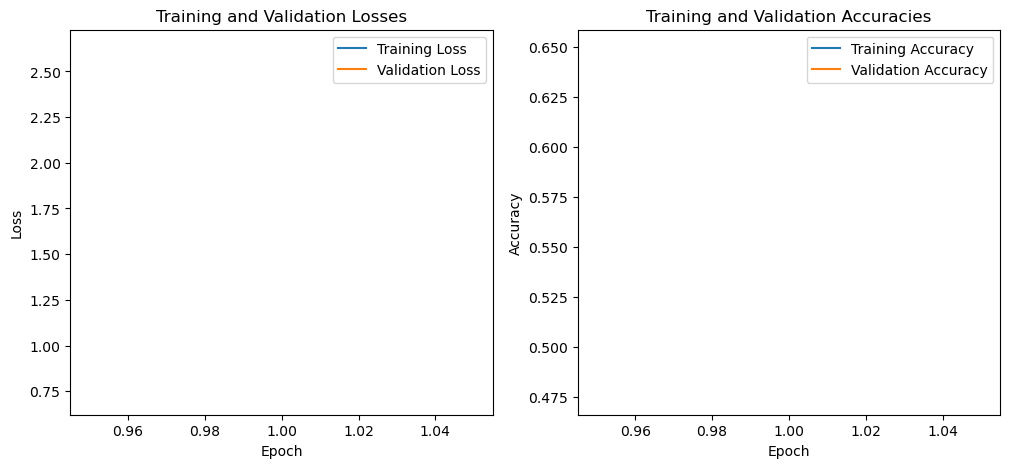

In [55]:
import torch
import datetime
import torch.nn as nn
import torch.optim as optim
# from dataloader import create_train_val_test_loaders
# from model import get_model
# from utils import transform

def train(model, train_loader, val_loader, test_loader, num_epochs, learning_rate, batch_size):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_val_loss = float("inf")
    best_model = None
    train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []
    test_image_paths, test_predicted_labels = [], []

    for epoch in range(num_epochs):
        
        model.train()
        total_loss = 0
        correct_train = 0
        total_train = 0

        for images, labels, _ in train_loader:
            
            images, labels = images.to(device), labels.reshape((-1,1)).to(device)
            optimizer.zero_grad()
            outputs = model(images)
            print(f'labels: {labels.size()}, preds: {outputs.size()}')
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = total_loss / len(train_loader)
        train_accuracy = correct_train / total_train

        # Validation
        val_loss, val_accuracy, _, _, _ = evaluate(model, val_loader, criterion, device)

        print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()

    # Testing
    model.load_state_dict(best_model)
    model.eval()

    test_loss, _, test_gt_labels, test_predicted_labels, test_image_paths = evaluate(model, test_loader, criterion, device)
    auroc = calculate_auroc(test_gt_labels, test_predicted_labels)
    print(f"Test AUROC: {auroc:.4f} - Batch Size: {batch_size}, Learning Rate: {learning_rate}")

    return best_model, train_losses, train_accuracies, val_losses, val_accuracies, test_image_paths, test_predicted_labels

def main():
    
    # Setting the environment variable to store pretrained model
    os.environ['TORCH_HOME'] = 'C:/Users/m294666/Documents/base_models'
    
    csv_file = 'C:/Users/m294666/Documents/nevus_labels.csv'
    best_model_path = 'C:/Users/m294666/Documents/yoga-lab/nevus_detector/best_models'
    batch_size = 32
    num_epochs = 1
    learning_rate = 0.001

    train_loader, val_loader, test_loader = create_train_val_test_loaders(csv_file, batch_size)

    model = get_model()
    best_model_weights, train_losses, train_accuracies, val_losses, val_accuracies, test_image_paths, test_predicted_labels = train(model, train_loader, val_loader, test_loader, num_epochs, learning_rate, batch_size)

    # Save the trained model weights to a file
    now = datetime.datetime.now()
    date_time_str = now.strftime("/best_model_weights_%m_%d_%y_%H_%M.pth")
    best_model_path += date_time_str
    torch.save(best_model_weights, best_model_path)
    
    # Plot and save train/val losses and accuracies
    plot_save_directory = 'C:/Users/m294666/Documents/yoga-lab/nevus_detector/plots'
    plot_and_save_losses_accuracies(train_losses, val_losses, train_accuracies, val_accuracies, plot_save_directory)

if __name__ == "__main__":
    main()

# Create labels csv

In [73]:
import os
import csv

# Define the main directory where your images are stored
main_directory = 'C:/Users/m294666/Documents/nevus_data_labels_verified_clear_images'

# Define the output CSV file name
csv_file = 'C:/Users/m294666/Documents/nevus_labels_verified_clear_images.csv'

# Function to extract the label from the image filename
def extract_label(filename):
    if filename[-6:] == '_0.jpg':
        return 0
    elif filename[-6:] == '_1.jpg':
        return 1
    else:
        return None

# Initialize a list to store image paths and labels
image_data = []
                
# Recursively search for JPG images in subdirectories
for root, _, files in os.walk(main_directory):
    for file in files:
        if file.lower().endswith('.jpg'):
            image_path = os.path.join(root, file)
            label = extract_label(file)
            if label is not None:
                image_data.append((image_path, label))

# Write the data to a CSV file
with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    # Write header row
    csv_writer.writerow(['Image Path', 'Label'])
    
    # Write image paths and labels
    for path, label in image_data:
        csv_writer.writerow([path, label])

print(f"CSV file '{csv_file}' has been created with image paths and labels.")

CSV file 'C:/Users/m294666/Documents/nevus_labels_verified_clear_images.csv' has been created with image paths and labels.


In [234]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image

# Read the CSV file into a DataFrame
# input_file = 'C:/Users/m294666/Documents/nevus_labels_verified_clear_images.csv'
# input_file = 'C:/Users/m294666/Documents/diaret_labels_final_balanced.csv'
input_file = 'C:/Users/m294666/Documents/diaret_labels_v2.csv'
# df = pd.read_csv(input_file)

# # Select 8 random entries
# random_entries = df.sample(n=8)

# # Create a subplot with 2 rows and 4 columns
# fig, axes = plt.subplots(2, 4, figsize=(12, 6))
# fig.suptitle('Randomly Selected Images with Labels')

# # Define an empty transform function (to be filled as needed)
# def transform_image(image):
#     return image

# # Load and plot the selected images with labels
# for i, (index, row) in enumerate(random_entries.iterrows()):
#     image_path = row['Image Path']
#     label = row['Label']
#     image = Image.open(image_path)
    
#     # Apply the transform function if needed
#     # transformed_image = transform_image(image)
    
#     # Plot the image on a subplot
#     ax = axes[i // 4, i % 4]
#     ax.imshow(image)
#     ax.set_title(label)
#     ax.axis('off')

# plt.show()

df = pd.read_csv(input_file)

# Apply the string replacements and transformations
df['Image Path'] = df['Image Path'].str.replace(r'C:/Users/m294666/Documents/', '/research/labs/ophthalmology/iezzi/m294666/').str.replace('\\', '/')
# df['Image Path'] = 'C:/Users/m294666/Documents/diaret_dataset/resized_train_cropped/resized_train_cropped/' + df['Image Path'] + '.jpeg'
# Save the modified DataFrame to a new CSV file
output_file = 'C:/Users/m294666/Documents/diaret_labels_v2_mforge.csv'
df.to_csv(output_file, index=False)

print(f"Modified CSV file '{output_file}' has been saved.")

Modified CSV file 'C:/Users/m294666/Documents/diaret_labels_v2_mforge.csv' has been saved.


#### create new diaret labels file with levels 3 and 4 only as label 1

In [225]:
import pandas as pd
import numpy as np

# Replace these paths with the actual paths of your input and output CSV files
input_file_path = 'C:/Users/m294666/Documents/diaret_dataset/trainLabels_cropped.csv'
output_file_path = 'C:/Users/m294666/Documents/diaret_labels_v2.csv'

# Load the CSV file
df = pd.read_csv(input_file_path)

# Create the 'Label' column based on 'level'
df['Label'] = np.where(df['level'].isin([3, 4]), 1, 0)

# Discard remaining rows
df = df[df['Label'].isin([0, 1])]

# Select only 'image' and 'Label' columns
df = df[['image', 'Label']]

# Rename 'image' column to 'Image_Path'
df = df.rename(columns={'image': 'Image Path'})

# Add prefix and suffix to 'Image_Path' entries
df['Image Path'] = 'C:/Users/m294666/Documents/diaret_dataset/resized_train_cropped/resized_train_cropped/' + df['Image Path'] + '.jpeg'

# Randomly drop 0 label entries to match the number of 1 label entries
num_zeros = df['Label'].value_counts()[0]
num_ones = df['Label'].value_counts()[1]
if num_zeros > num_ones:
    df = df.drop(df[df['Label'] == 0].sample(num_zeros - num_ones).index)

# Save the modified DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

In [177]:
import pandas as pd

# Assuming your CSV file is named 'your_file.csv'
file_path = 'C:/Users/m294666/Documents/diaret_labels_final.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Separate the data based on labels
label_0 = df[df['Label'] == 0]
label_1 = df[df['Label'] == 1]

# Randomly select the same number of entries for label 0 as there are for label 1
label_0_sampled = label_0.sample(n=len(label_1), replace=True)

# Concatenate the sampled label 0 entries with all label 1 entries
balanced_df = pd.concat([label_0_sampled, label_1])

# Shuffle the DataFrame to mix the entries
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Save the balanced DataFrame to a new CSV file
balanced_file_path = 'C:/Users/m294666/Documents/diaret_labels_final_balanced.csv'
balanced_df.to_csv(balanced_file_path, index=False)

print(f"Balanced data saved to {balanced_file_path}")

Balanced data saved to C:/Users/m294666/Documents/diaret_labels_final_balanced.csv


In [226]:
import pandas as pd
csv_file_path = 'C:/Users/m294666/Documents/diaret_labels_v2.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Image Path,Label
0,C:/Users/m294666/Documents/diaret_dataset/resi...,0
1,C:/Users/m294666/Documents/diaret_dataset/resi...,1
2,C:/Users/m294666/Documents/diaret_dataset/resi...,1
3,C:/Users/m294666/Documents/diaret_dataset/resi...,0
4,C:/Users/m294666/Documents/diaret_dataset/resi...,0


In [227]:
# Count the number of each label in the "Label" column
label_counts = df['Label'].value_counts()

# Calculate the percentage of each label
label_percentages = label_counts / len(df) * 100

# Print the count and percentage of each label
for label, count in label_counts.items():
    percentage = label_percentages[label]
    print(f"Label {label}: Count = {count}, Percentage = {percentage:.2f}%")

Label 0: Count = 1580, Percentage = 50.00%
Label 1: Count = 1580, Percentage = 50.00%


### Output predictions

In [18]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

def create_subplot(test_image_paths, test_predicted_labels, csv_file_path, save_dir):
    # Read the CSV file and create a DataFrame
    df = pd.read_csv(csv_file_path)
        
    # Obtain the ground truth labels associated with test_image_paths
    ground_truth_labels = []
    for image_path in test_image_paths:
        row = df[df['Image Path'] == image_path]
        if not row.empty:
            ground_truth_labels.append(row['Label'].values[0])
    
    # Randomly choose 16 images
    random.seed(42)  # Set a seed for reproducibility
    selected_indices = random.sample(range(len(test_image_paths)), 8)
    
    # Create a 2x4 subplot
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
#     fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    # Loop through selected images and plot them
    for i, index in enumerate(selected_indices):
        image_path = test_image_paths[index]
        predicted_label = test_predicted_labels[index]
        ground_truth_label = ground_truth_labels[index]
        ax = axes[i // 4, i % 4]
        ax.axis('off')
        ax.set_title(f'Prediction: {predicted_label}', color='green' if predicted_label == ground_truth_label else 'red')
        img = plt.imread(image_path)
        ax.imshow(img)
    
    # Save the subplot to the specified directory
    save_path = save_dir + "preds_plot.png"
    fig.tight_layout()
    plt.savefig(save_path)
    plt.close()
    print(f'Preds plot saved to {save_path}')

# Example usage:
test_image_paths = [r"C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.10_0.jpg",
                    r"C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.12_1.jpg",
                    r"C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.14_0.jpg",
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.15_0.jpg',
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.16_0.jpg',
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.1_0.jpg',
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.2_0.jpg',
                    r'C:/Users/m294666/Documents/nevus_data\09_20_23\10544859\1.2.826.0.2.139953.1.2.50886.44751.36132.4_0.jpg']
test_predicted_labels = [1,0,0,1,1,0,1,0]
csv_file_path = 'C:/Users/m294666/Documents/nevus_labels.csv'
save_dir = 'C:/Users/m294666/Documents/'
create_subplot(test_image_paths, test_predicted_labels, csv_file_path, save_dir)

Preds plot saved to C:/Users/m294666/Documents/preds_plot.png


### Grad-CAM

#### config

In [14]:
import argparse

def parse_arguments():
    parser = argparse.ArgumentParser(description="Training and validating a nevus detector model.")

    parser.add_argument('--main_dir', default='C:/Users/m294666/Documents/', type=str,
                        help="The main directory")

    # main_dir = 'C:/Users/m294666/Documents/'
    # main_dir = '/research/labs/ophthalmology/iezzi/m294666/'

    parser.add_argument(
        '--pretrained_dir',
        default='/research/labs/ophthalmology/iezzi/m294666/pretrained_models/resnet_pretrained_weights_distorted.pth',
        type=str,
        help="The directory for the pretrained model")

    parser.add_argument('--batch_size', default=[16,32,64],
                        help="Batch size (default: 32)")

    parser.add_argument('--num_epochs', default=50, type=int,
                        help="Number of epochs (default: 1)")

    parser.add_argument('--learning_rate', default=[0.0001,0.001,0.01,0.1],
                        help="Learning rate (default: 0.001)")

    args = parser.parse_args()
    return args

args = parse_arguments()

usage: ipykernel_launcher.py [-h] [--main_dir MAIN_DIR] [--pretrained_dir PRETRAINED_DIR] [--batch_size BATCH_SIZE] [--num_epochs NUM_EPOCHS]
                             [--learning_rate LEARNING_RATE]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\m294666\AppData\Roaming\jupyter\runtime\kernel-55b75616-cc5f-4024-85ff-c30619af5c8a.json


SystemExit: 2

#### dataloader

In [45]:
import torch
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image

def transform(image, image_size=224):
    preprocess = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
    ])
    
    return preprocess(image)

class CustomDataset(Dataset):
    def __init__(self, csv_file, image_size=224):
        self.data = pd.read_csv(csv_file)
        self.image_size = image_size
        self.file_paths = self.data.iloc[:, 0].values
        self.labels = self.data.iloc[:, 1].values
        self.targets = self.labels.tolist()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data.iloc[idx]
        image = Image.open(img_path)  # Load image using the file path
        image = transform(image, self.image_size)
        label = torch.tensor(label, dtype=torch.float32)

        return image, label, img_path

#### model

In [168]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import models
from skimage.io import imread
from skimage.transform import resize

class CustomResNet18(nn.Module):
    def __init__(self, num_outputs=2, pretrained=None):
        super(CustomResNet18, self).__init__()
        
        self.gradients = None
        self.tensorhook = []
        self.layerhook = []
        self.selected_out = None

        # Load the pre-trained ResNet-18 model if a path is provided, or create a new one
        if pretrained is not None:
            self.model = models.resnet18()
            self.model.load_state_dict(torch.load(pretrained))
        else:
            self.model = models.resnet18(weights='IMAGENET1K_V1')
            
        self.layerhook.append(self.model.layer4.register_forward_hook(self.forward_hook()))
        
        for p in self.model.parameters():
            p.requires_grad = True

        # Modify the final FC layer
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_outputs)
        
    def activations_hook(self,grad):
        self.gradients = grad

    def get_act_grads(self):
        return self.gradients

    def forward_hook(self):
        def hook(module, inp, out):
            self.selected_out = out
            self.tensorhook.append(out.register_hook(self.activations_hook))
        return hook

    def forward(self, x):
        out = self.model(x)
        return out, self.selected_out

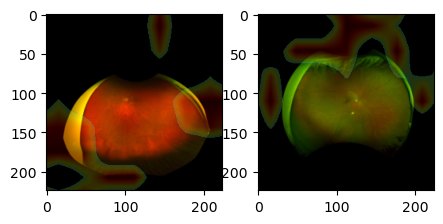

In [298]:
model = CustomResNet18()

images_gradcam = []
labels_gradcam = []
preds_gradcam = []

# Create dataloaders
csv_file = main_dir + 'nevus_labels.csv'
_, _, test_loader = create_train_val_test_loaders(csv_file, 1)

fig,ax = plt.subplots(1,2,figsize=(5,5))

for itr,(img,label,_) in enumerate(test_loader):
    
    if itr == 2:
        break
    
    out, acts = model(img)
    acts = acts.detach()
    
    predicted_label = torch.argmax(out, dim=1)

    loss = nn.CrossEntropyLoss()(out,label.long())
    loss.backward()

    grads = model.get_act_grads().detach()

    pooled_grads = torch.mean(grads, dim=[0,2,3]).detach()

    for i in range(acts.shape[1]):
        acts[:,i,:,:] *= pooled_grads[i]

    heatmap_j = torch.mean(acts, dim = 1).squeeze()
    heatmap_j_max = heatmap_j.max(axis = 0)[0]
    heatmap_j /= heatmap_j_max

    heatmap_j = torch.where(heatmap_j > 0.5, heatmap_j, torch.zeros_like(heatmap_j)).detach().numpy()
    heatmap_j = resize(heatmap_j,(224,224),preserve_range=True)

    # Set your threshold value (adjust as needed)
    threshold = 0.5

    # Create a mask for values greater than the threshold
    mask = heatmap_j > threshold
    alpha = mask.astype(float)

    # Apply the mask to the heatmap
    result_heatmap = np.copy(heatmap_j)
    result_heatmap[~mask] = 0

    # Overlay the adjusted heatmap on the image
    combined = img[0].numpy().transpose((1,2,0)).copy()
    combined = combined[:, :, :3]

    # Display the result
    ax[itr].imshow(combined)
    ax[itr].imshow(result_heatmap, cmap='jet', alpha=0.2*alpha)  # Use alpha to control the transparency

plt.show()

#### utils

In [41]:
import random
import pandas as pd
from torch.utils.data import DataLoader, random_split
# from dataloader import CustomDataset
# from model import CustomResNet18
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def get_model(num_outputs=2, pretrained=None, layer_names_to_freeze=[]):
    model = CustomResNet18(num_outputs)
    freeze_layers(model, layer_names_to_freeze)
#     print_trainable_layers(model)
    return model

def create_train_val_test_loaders(csv_file, batch_size, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2, image_size=224):
    dataset = CustomDataset(csv_file, image_size=image_size)
    
    # Calculate data split sizes
    total_samples = len(dataset)
    train_size = int(train_ratio * total_samples)
    val_size = int(val_ratio * total_samples)
    test_size = total_samples - train_size - val_size
    
    # Split the dataset into train, validation, and test sets
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    # Create DataLoader instances for train, validation, and test datasets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

def freeze_layers(model, layer_names_to_freeze):
    for name, param in model.named_parameters():
        if any(name.startswith(layer_name) for layer_name in layer_names_to_freeze):
            param.requires_grad = False

def print_trainable_layers(model):
    print("Trainable Layers:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name)

#### gradcam

In [42]:
import os
import torch
import torchvision
import datetime
from torchvision import models, transforms
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np
import random

# from config import parse_arguments
# from utils import get_model, create_train_val_test_loaders

# Create a function to generate Grad-CAM
def generate_gradcam(model, img, target_layer, threshold):
    # Forward pass
    output = model(img)
    model.zero_grad()
    
    # Calculate the gradient of the output with respect to the target layer
    output.backward(gradient=torch.ones_like(output))

    # Get the gradients at the target layer
    grads = target_layer.weight.grad

    # Global average pooling
    pooled_grads = F.adaptive_avg_pool2d(grads, (1, 1))
    
    # Get the activation map from the target layer
    activation_map = target_layer(img)
    
    for i in range(activation_map.size(1)):
        activation_map[:, i, :, :] *= pooled_grads[:, i, :, :]

    heatmap = activation_map.mean(dim=1, keepdim=True)
    
    heatmap = F.relu(heatmap)

    # Apply thresholding
    heatmap = torch.where(heatmap > threshold, heatmap, torch.zeros_like(heatmap))

    return heatmap

# Define a function to plot images with Grad-CAM
def plot_gradcam(images, heatmap, predictions, labels, file_name):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i in range(4):
        for j in range(4):
            idx = random.randint(0, len(images) - 1)
            image = images[idx]
            ax = axes[i, j]
            ax.axis('off')
            ax.imshow(image.transpose(1, 2, 0))
            ax.imshow(heatmap[idx].squeeze().cpu().data.numpy(), cmap='viridis', alpha=0.5, interpolation='bilinear')

            # Get the prediction and label for this image
            prediction = predictions[idx]
            label = labels[idx]

            # Set the title color based on matching prediction and label
            title_color = 'green' if prediction == label else 'red'
            ax.set_title(f'Prediction: {prediction}, Label: {label}', color=title_color)

    fig.tight_layout()
#     plt.savefig(file_name)
    plt.show()
#     plt.close()



#     args = parse_arguments()
main_dir = 'C:/Users/m294666/Documents/'

# Set the environment variable to store pretrained model
os.environ['TORCH_HOME'] = main_dir + 'base_models'

# Create dataloaders
csv_file = main_dir + 'nevus_labels.csv'
_, _, test_loader = create_train_val_test_loaders(csv_file, 1)

# Load the ResNet-18 model
#     model = get_model(pretrained = '/research/labs/ophthalmology/iezzi/m294666/nevus_detector_best_models/best_model_weights_11_02_23_20_11.pth')
model = get_model()
model.eval()

# Generate Grad-CAM for a batch of test images
test_images, test_labels = [], []
for i, (image, label, _) in enumerate(test_loader):
    if i == 16:
        break
    test_images.append(image)
    test_labels.append(label)
    break


#     # Convert the images and labels to tensors
test_images = torch.stack(test_images, dim=0)
test_images = test_images.squeeze(1)
test_labels = torch.cat(test_labels).int()

#     print('test images shape:', test_images.shape)

#     # Specify the target layer (modify this according to your model's architecture)
#     target_layer =  model.model.layer4[1].conv2  # You may need to adjust the layer according to your model's architecture

#     # Define the threshold for heatmap visualization
#     threshold = 0.5  # Adjust this threshold as needed

#     # Generate Grad-CAM for the images with thresholding
#     heatmap = generate_gradcam(model, test_images, target_layer, threshold)

# Make predictions for the test images
with torch.no_grad():
    predictions = model(test_images).cpu().numpy()

#     # Plot the images with Grad-CAM and colored titles
#     now = datetime.datetime.now()
#     gradcam_str = now.strftime('nevus_detector_preds/gradcam_%m_%d_%y_%H_%M.png')
#     gradcam_path = args.main_dir + gradcam_str
#     plot_gradcam(test_images, heatmap, predictions, test_labels, gradcam_path)

# Defining image transforms

In [229]:
def enhance_contrast(img, contrast): 
    alpha_c = 131*(contrast + 127)/(127*(131-contrast))
    gamma_c = 127*(1-alpha_c)
    enhanced_img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)
    
    return enhanced_img

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

def transform_image_2(image, IMG_SIZE=224, sigmaX=10):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    
#     return image
    
    brightness_factor = 2.0  # Adjust as needed (1.0 is no change)
    contrast_factor = 1.5    # Adjust as needed (1.0 is no change)
    
#     image = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=brightness_factor)
    
    # Split the image into color channels (BGR format)
    r, g, b = cv2.split(image)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the green channel
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(6, 6))
    enhanced_g = clahe.apply(g)

    # Merge the enhanced green channel back with the blue and red channels
#     image = cv2.merge((r, enhanced_g, b))
    
#     image = enhance_contrast(image,-20)
    
#     image=cv2.addWeighted ( image, 4, cv2.GaussianBlur( image , (0,0) , sigmaX) , -4, 128)

    return image

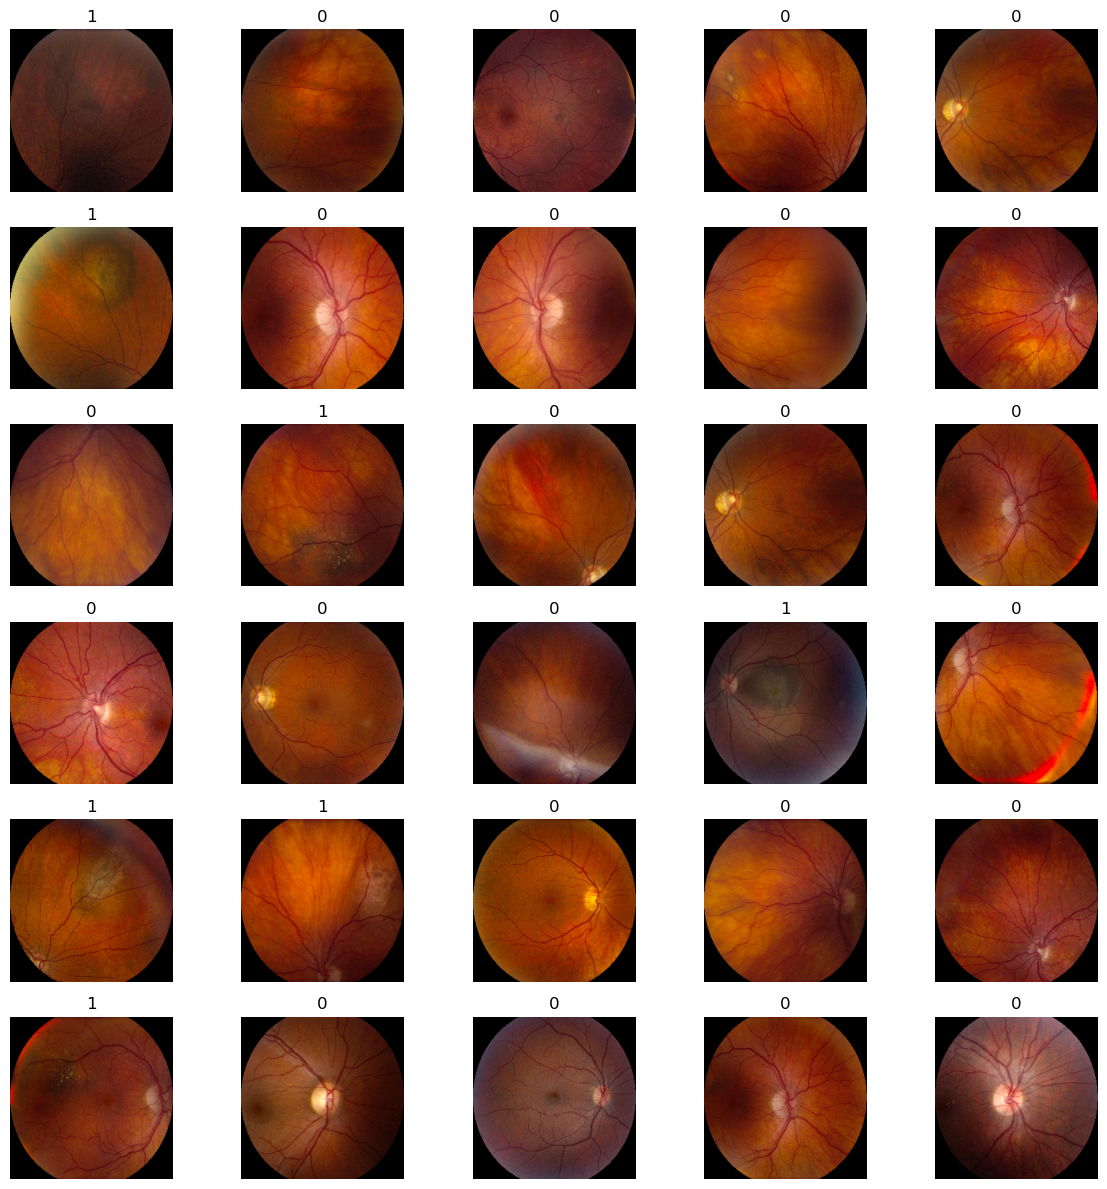

In [239]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

# Read the CSV file into a DataFrame
# input_file = 'C:/Users/m294666/Documents/diaret_labels_final_balanced.csv'
# input_file = 'C:/Users/m294666/Documents/nevus_labels_verified.csv'
input_file = 'C:/Users/m294666/Documents/nevus_labels_verified_clear_images.csv'
# input_file = 'C:/Users/m294666/Documents/diaret_labels_final_balanced.csv'
# input_file = 'C:/Users/m294666/Documents/diaret_labels_v2.csv'
df = pd.read_csv(input_file)

# Select 16 random entries
random_entries = df.sample(n=30)

# Create a subplot with 2 rows and 4 columns
fig, axes = plt.subplots(6, 5, figsize=(12, 12))
# fig.suptitle('Randomly Selected Images with Labels')

# Load and plot the selected images with labels
for i, (index, row) in enumerate(random_entries.iterrows()):
    image_path = row['Image Path']
    label = row['Label']
    image = cv2.imread(image_path)

    # Apply the transform function if needed
    image = transform_image_2(image, sigmaX=10)
    
    # Plot the image on a subplot
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

fig.tight_layout()
plt.show()

##### 